In [ ]:
from google.colab import drive
drive.mount('/content/drive')


!pip install mne

import mne
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History
from sklearn.model_selection import KFold

history = History()

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 50.0 MB/s eta 0:00:00


In [ ]:


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.optimizers import AdamW

def create_model(input_shape):
  model = Sequential()

  # First Conv2D layer
  model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))

  # First MaxPooling layer
  model.add(MaxPooling2D(pool_size=(1, 5), strides=(1, 5)))

  # Second Conv2D layer
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

  # Second MaxPooling layer
  model.add(MaxPooling2D(pool_size=(2, 5), strides=(2, 5)))


  # Flatten layer
  model.add(Flatten())

  # Fully connected Dense layer with L2 regularization
  model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

  # Output layer with L2 regularization
  model.add(Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

  # Compile the model with AdamW optimizer and learning rate decay
  model.compile(
      optimizer=AdamW(learning_rate=0.001, weight_decay=0.01),  # Optimizer
      # Loss function to minimize
      loss=keras.losses.CategoricalCrossentropy(),
      # List of metrics to monitor
      metrics=['accuracy'],
  )

  # Early stopping and learning rate scheduler callbacks
  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  return model




Reading /content/drive/MyDrive/eeg_data/ica-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5996.00 ms
        0 CTF compensation matrices available
Not setting metadata
1050 matching events found
No baseline correction applied
0 projection items activated
Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
100/105 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3445 - loss: 6.6181
Epoch 1: val_loss improved from inf to 1.47137, saving model to best_models/best_model_fold_1.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3534 - loss: 6.4226 - val_accuracy: 0.6571 - val_loss: 1.4714
Epoch 2/30
103/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8015 - loss: 1.0723
Epoch 2: val_loss improved from 1.47137 to 1.39806, saving model to best_models/best_model_fold_1.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8010 - loss: 1.0726 - val_accuracy: 0.7048 - val_loss: 1.3981
Epoch 3/30
102/105 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8723 - loss: 0.7833
Epoch 3: val_loss improved from 1.39806 to 1.31179, saving model to best_models/best_model_fold_1.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8714 - loss: 0.7852 - val_accuracy: 0.7048 - val_loss: 1.3118
Epoch 4/30
101/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9237 - loss: 0

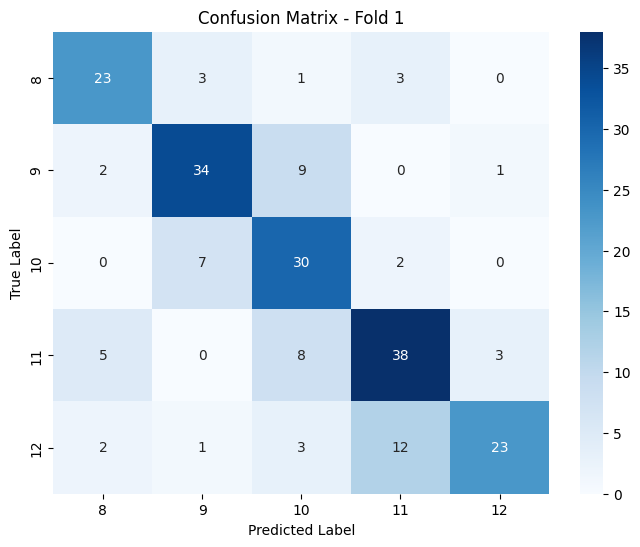

Classification Report for Fold 1
              precision    recall  f1-score   support

           8       0.72      0.77      0.74        30
           9       0.76      0.74      0.75        46
          10       0.59      0.77      0.67        39
          11       0.69      0.70      0.70        54
          12       0.85      0.56      0.68        41

    accuracy                           0.70       210
   macro avg       0.72      0.71      0.71       210
weighted avg       0.72      0.70      0.70       210

Score for fold 1: compile_metrics of 70.48%
Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
102/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3362 - loss: 8.1271
Epoch 1: val_loss improved from inf to 1.50757, saving model to best_models/best_model_fold_2.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.3401 - loss: 7.9582 - val_accuracy: 0.6810 - val_loss: 1.5076
Epoch 2/30
103/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7135 - loss: 1.3276
Epoch 2: val_loss improved from 1.50757 to 1.23810, saving model to best_models/best_model_fold_2.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7137 - loss: 1.3260 - val_accuracy: 0.7857 - val_loss: 1.2381
Epoch 3/30
103/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8365 - loss: 0.8851
Epoch 3: val_loss improved from 1.23810 to 1.20047, saving model to best_models/best_model_fold_2.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8364 - loss: 0.8842 - val_accuracy: 0.7762 - val_loss: 1.2005
Epoch 4/30
102/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9022 - loss: 0

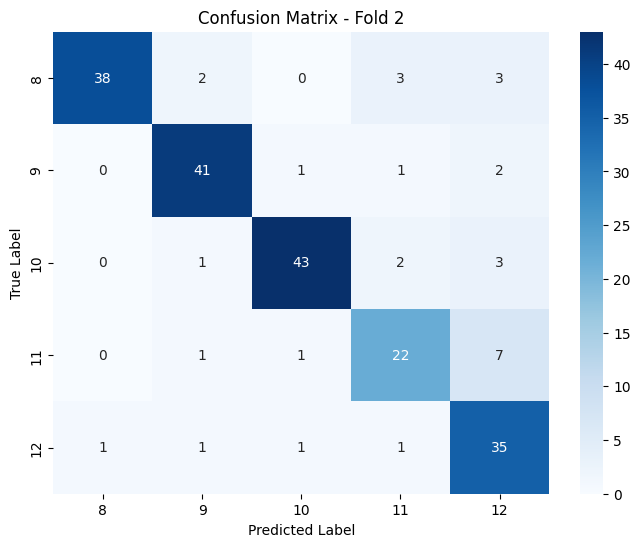

Classification Report for Fold 2
              precision    recall  f1-score   support

           8       0.97      0.83      0.89        46
           9       0.89      0.91      0.90        45
          10       0.93      0.88      0.91        49
          11       0.76      0.71      0.73        31
          12       0.70      0.90      0.79        39

    accuracy                           0.85       210
   macro avg       0.85      0.84      0.84       210
weighted avg       0.86      0.85      0.85       210

Score for fold 2: compile_metrics of 85.24%
Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
101/105 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3595 - loss: 5.6957
Epoch 1: val_loss improved from inf to 1.45929, saving model to best_models/best_model_fold_3.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.3662 - loss: 5.5591 - val_accuracy: 0.6571 - val_loss: 1.4593
Epoch 2/30
102/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7043 - loss: 1.2252
Epoch 2: val_loss improved from 1.45929 to 1.33075, saving model to best_models/best_model_fold_3.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7058 - loss: 1.2232 - val_accuracy: 0.6952 - val_loss: 1.3307
Epoch 3/30
103/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8382 - loss: 0.9104
Epoch 3: val_loss improved from 1.33075 to 1.18523, saving model to best_models/best_model_fold_3.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8381 - loss: 0.9101 - val_accuracy: 0.7667 - val_loss: 1.1852
Epoch 4/30
 99/105 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8886 - loss: 0

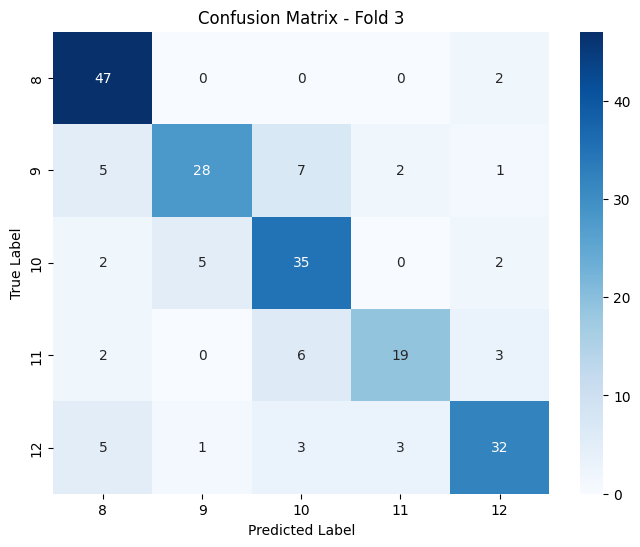

Classification Report for Fold 3
              precision    recall  f1-score   support

           8       0.77      0.96      0.85        49
           9       0.82      0.65      0.73        43
          10       0.69      0.80      0.74        44
          11       0.79      0.63      0.70        30
          12       0.80      0.73      0.76        44

    accuracy                           0.77       210
   macro avg       0.77      0.75      0.76       210
weighted avg       0.77      0.77      0.76       210

Score for fold 3: compile_metrics of 76.67%
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
102/105 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3673 - loss: 5.1974 
Epoch 1: val_loss improved from inf to 1.43419, saving model to best_models/best_model_fold_4.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.3735 - loss: 5.1008 - val_accuracy: 0.7000 - val_loss: 1.4342
Epoch 2/30
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7642 - loss: 1.1814
Epoch 2: val_loss did not improve from 1.43419
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7647 - loss: 1.1774 - val_accuracy: 0.6714 - val_loss: 1.7751
Epoch 3/30
103/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8522 - loss: 0.8447
Epoch 3: val_loss improved from 1.43419 to 1.36754, saving model to best_models/best_model_fold_4.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8518 - loss: 0.8449 - val_accuracy: 0.6810 - val_loss: 1.3675
Epoch 4/30
101/105 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9044 - loss: 0.5978
Epoch 4: val_loss improved from 1.36754 to 1.26122,

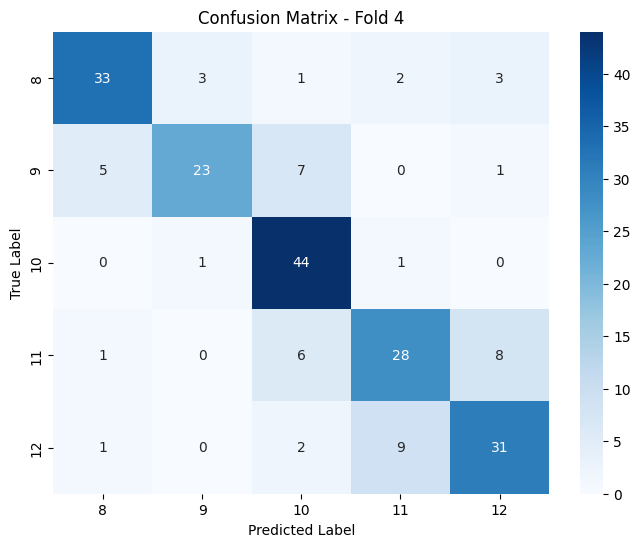

Classification Report for Fold 4
              precision    recall  f1-score   support

           8       0.82      0.79      0.80        42
           9       0.85      0.64      0.73        36
          10       0.73      0.96      0.83        46
          11       0.70      0.65      0.67        43
          12       0.72      0.72      0.72        43

    accuracy                           0.76       210
   macro avg       0.77      0.75      0.75       210
weighted avg       0.76      0.76      0.75       210

Score for fold 4: compile_metrics of 75.71%
Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3394 - loss: 6.2448
Epoch 1: val_loss improved from inf to 1.37826, saving model to best_models/best_model_fold_5.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3463 - loss: 6.0083 - val_accuracy: 0.6810 - val_loss: 1.3783
Epoch 2/30
 99/105 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7523 - loss: 1.2072
Epoch 2: val_loss improved from 1.37826 to 1.32041, saving model to best_models/best_model_fold_5.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7527 - loss: 1.2028 - val_accuracy: 0.7238 - val_loss: 1.3204
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8494 - loss: 0.8108
Epoch 3: val_loss improved from 1.32041 to 1.14306, saving model to best_models/best_model_fold_5.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8495 - loss: 0.8105 - val_accuracy: 0.7810 - val_loss: 1.1431
Epoch 4/30
102/105 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9271 - loss: 0

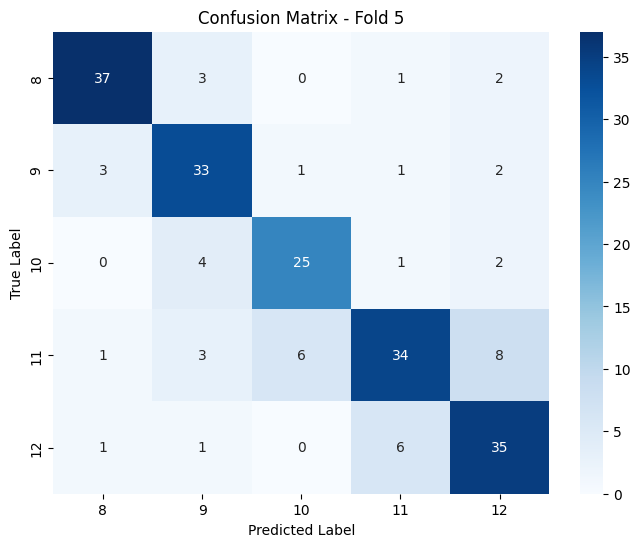

Classification Report for Fold 5
              precision    recall  f1-score   support

           8       0.88      0.86      0.87        43
           9       0.75      0.82      0.79        40
          10       0.78      0.78      0.78        32
          11       0.79      0.65      0.72        52
          12       0.71      0.81      0.76        43

    accuracy                           0.78       210
   macro avg       0.78      0.79      0.78       210
weighted avg       0.78      0.78      0.78       210

Score for fold 5: compile_metrics of 78.10%
Average accuracy: 77.24%
Standard deviation: 4.76%


In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

# Load data
cca_cwt = np.load('/content/drive/MyDrive/eeg_data/cca_cwt.npy')
epochs = mne.read_epochs("/content/drive/MyDrive/eeg_data/ica-epo.fif")

X = cca_cwt.transpose(0, 2, 3, 1)
labels = epochs.events[:, -1] - 1
labels = to_categorical(labels, num_classes=5)

# K-fold cross-validation configuration
k = 5
kf = KFold(n_splits=k, shuffle=True)
acc_per_fold = []
fold_no = 1

# Directory to save the best models for each fold
save_dir = "best_models"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Training loop with model saving
for train_index, val_index in kf.split(X):
    print(f'Fold {fold_no}')

    # Split data for training and validation
    x_train, x_val = X[train_index], X[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Create a new model instance
    model = create_model(X[0].shape)

    # Set up ModelCheckpoint to save the best model
    checkpoint_path = os.path.join(save_dir, f'best_model_fold_{fold_no}.keras')
    checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

    # Train the model with ModelCheckpoint callback
    model.fit(x_train, y_train, epochs=30, batch_size=8, verbose=1,
              validation_data=(x_val, y_val), callbacks=[checkpoint_callback])

    # Load the best weights for evaluation
    model.load_weights(checkpoint_path)

    # Predict and evaluate
    y_pred = model.predict(x_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[8, 9, 10, 11, 12], yticklabels=[8, 9, 10, 11, 12])
    plt.title(f'Confusion Matrix - Fold {fold_no}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Classification report
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(8, 13)]))

    # Evaluation
    scores = model.evaluate(x_val, y_val, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1] * 100:.2f}%')
    acc_per_fold.append(scores[1] * 100)

    fold_no += 1

# Final summary
print(f'Average accuracy: {np.mean(acc_per_fold):.2f}%')
print(f'Standard deviation: {np.std(acc_per_fold):.2f}%')
